### Data Analysis

In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open("data/database/sample.json", 'r') as f:
    sample = json.load(f)

In [4]:
len(sample)

1000

In [5]:
for item in sample:
    for item in list(item.keys()):
        print(item + ' , ', end='')
    break

ID , age , gender , profession , interest , home_address , foreign_address , date_out , date_return , fund2invest , remittance , travell , social_work , personal_view , 

### Data Processing

1. Drop views
2. Seperate home address [PN,District,MCP,Ward]
3. Seperate Foreign address [country,lat,long,city]
4. Use lambda function $1000 = $1K
5. Create new column [month] with total month duration between data out-date return

#### Data Exploration

1. Age distribution ?
2. Gender and age - correlation?
3. County- gender ? Country- age ?
4. Histogram, bar-plot, ven-diagram ?

#### Data modeling - Machine lerning ( Scikit-learn)

1. Linear-regression, 
2. Classifier

#### Data Visualization ( matplotlib.pyplot, seaborn, Bokeh, plotly(Python-API)) (D3.JS, chart.js)

1. Plot generation

----------

In [6]:
sample[0]

{'ID': '3LJJB6B924',
 'age': 29,
 'date_out': '2014.9.21',
 'date_return': '2022.3.16',
 'foreign_address': {'ID': 'CR',
  'city': 'N',
  'country': 'Costa-Rica',
  'lat': '9.748917',
  'lon': '-83.753428'},
 'fund2invest': {'agriculture': '5%',
  'alternative energy': '10%',
  'animal husbandary': '5%',
  'consultancy service': '9%',
  'cottage industries': '3%',
  'infrastructure': '6%',
  'invetsment sector': '3%',
  'personal service business': '2%',
  'retail business': '1%',
  'total_fund': 4091,
  'tourism and hospitality': '5%'},
 'gender': 'female',
 'home_address': {'MCP': 'Bheri MCP',
  'district': 'Jajarkot',
  'province': 'PN6',
  'ward': 'Ward 7'},
 'interest': 'art',
 'personal_view': ['Kathmandu Metropolitan City’s undying infatuation for the preface ‘smart’ has manifested in several glossy (and costly) infrastructural undertakings—from zebra crossings to dustbins and even toilets. But contrary to what ‘smart’ suggests, many of these initiatives seem devoid of any intel

### Data Processing Part
#### 1.Drop views
#### 2.Seperate home address [PN,District,MCP,Ward]
#### 3.Seperate Foreign address [country,lat,long,city]

In [7]:
Data = []
k = 0
for item in sample:
    #print(item.values()) 
    ID = item['ID']
    age = item['age']
    date_out=item['date_out'] #Added part
    date_return=item['date_return'] #Added part
    gender = item['gender']
    country = item['foreign_address']['country']
    city=item['foreign_address']['city'] #Added part
    lat = item['foreign_address']['lat']
    lon = item['foreign_address']['lon']
    province = item['home_address']['province']
    district = item['home_address']['district']
    mcp=item['home_address']['MCP'] #Added part
    ward=item['home_address']['ward'] #Added part
    interest = item['interest']
    profession = item['profession']['branch']
    personal_view=item['personal_view']
    income = 0
    for t in item['remittance']:
        income = income+t['amount']
        
    
    Data.append({'ID': ID,\
                 "age":age,\
                 "date_out":date_out,\
                 "date_return":date_return,\
                 "gender":gender,\
                 "country": country,\
                 "city":city,\
                 "lat": lat,\
                 "lon":lon,\
                 "province":province,\
                 "district": district,\
                 "MCP":mcp,\
                 "ward":ward,\
                 "interest": interest,\
                 "profession": profession,\
                 "personal_view":personal_view,\
                 "income": income})
    

In [8]:
DF = pd.DataFrame(Data)
num_columns = len(DF.columns)
pd.set_option("display.max_columns", num_columns+1)
DF = DF.set_index("ID")
DF=DF.drop(['personal_view'],axis=1)
DF.head(2)

,MCP,age,city,country,date_out,date_return,district,gender,income,interest,lat,lon,profession,province,ward
ID,,,,,,,,,,,,,,,
3LJJB6B924,Bheri MCP,29,N,Costa-Rica,2014.9.21,2022.3.16,Jajarkot,female,3180,art,9.748917,-83.753428,Zoologists and Wildlife Biologists,PN6,Ward 7
5S5MI9J6K4,Bhokraha RM,44,N,Cook-Islands,2011.10.26,2020.3.15,Sunsari,female,3410,novel,-21.236736,-159.777671,Military Enlisted Tactical Operations and Air/...,PN1,Ward 5


### 4. Use Lambda function 1000=1k

In [9]:
def thousand_k(x):
    return str(round((x/1000),1))+'k'

def thousand_k_converter(column_name):
    DF['rounded_'+str(column_name)]=DF.apply(lambda x: thousand_k(x[str(column_name)]),axis=1)
#     df['rounded_income']=df.apply(lambda x: thousand_k(x['income'],axis=1))

In [10]:
thousand_k_converter('income')
DF.head(2)

,MCP,age,city,country,date_out,date_return,district,gender,income,interest,lat,lon,profession,province,ward,rounded_income
ID,,,,,,,,,,,,,,,,
3LJJB6B924,Bheri MCP,29,N,Costa-Rica,2014.9.21,2022.3.16,Jajarkot,female,3180,art,9.748917,-83.753428,Zoologists and Wildlife Biologists,PN6,Ward 7,3.2k
5S5MI9J6K4,Bhokraha RM,44,N,Cook-Islands,2011.10.26,2020.3.15,Sunsari,female,3410,novel,-21.236736,-159.777671,Military Enlisted Tactical Operations and Air/...,PN1,Ward 5,3.4k


### 5. Create new column[month] with total month duration between data out-date return

In [11]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 3LJJB6B924 to S8F33VUEW2
Data columns (total 16 columns):
MCP               1000 non-null object
age               1000 non-null int64
city              1000 non-null object
country           1000 non-null object
date_out          1000 non-null object
date_return       1000 non-null object
district          1000 non-null object
gender            1000 non-null object
income            1000 non-null int64
interest          1000 non-null object
lat               1000 non-null object
lon               1000 non-null object
profession        1000 non-null object
province          1000 non-null object
ward              1000 non-null object
rounded_income    1000 non-null object
dtypes: int64(2), object(14)
memory usage: 132.8+ KB


In [12]:
DF['date_return']=pd.to_datetime(DF.date_return,format='%Y.%m.%d', errors='coerce')
DF['date_out']=pd.to_datetime(DF.date_out,format='%Y.%m.%d', errors='coerce')

In [13]:
DF['month']=round(((DF['date_return']-DF['date_out']).dt.days)/30)

In [14]:
DF.head(1)

,MCP,age,city,country,date_out,date_return,district,gender,income,interest,lat,lon,profession,province,ward,rounded_income,month
ID,,,,,,,,,,,,,,,,,
3LJJB6B924,Bheri MCP,29,N,Costa-Rica,2014-09-21,2022-03-16,Jajarkot,female,3180,art,9.748917,-83.753428,Zoologists and Wildlife Biologists,PN6,Ward 7,3.2k,91.0


### Data Exploration

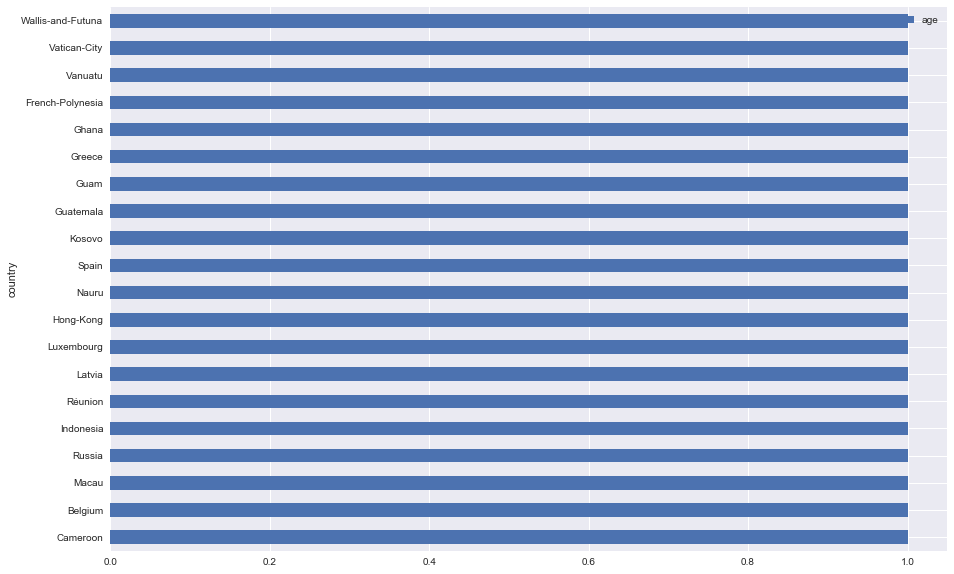

In [15]:
%matplotlib inline
Country = DF.groupby('country').count()['age']
df = pd.DataFrame(Country)
df = df.sort_values('age')
df[0:20].plot.barh(figsize = [15,10])

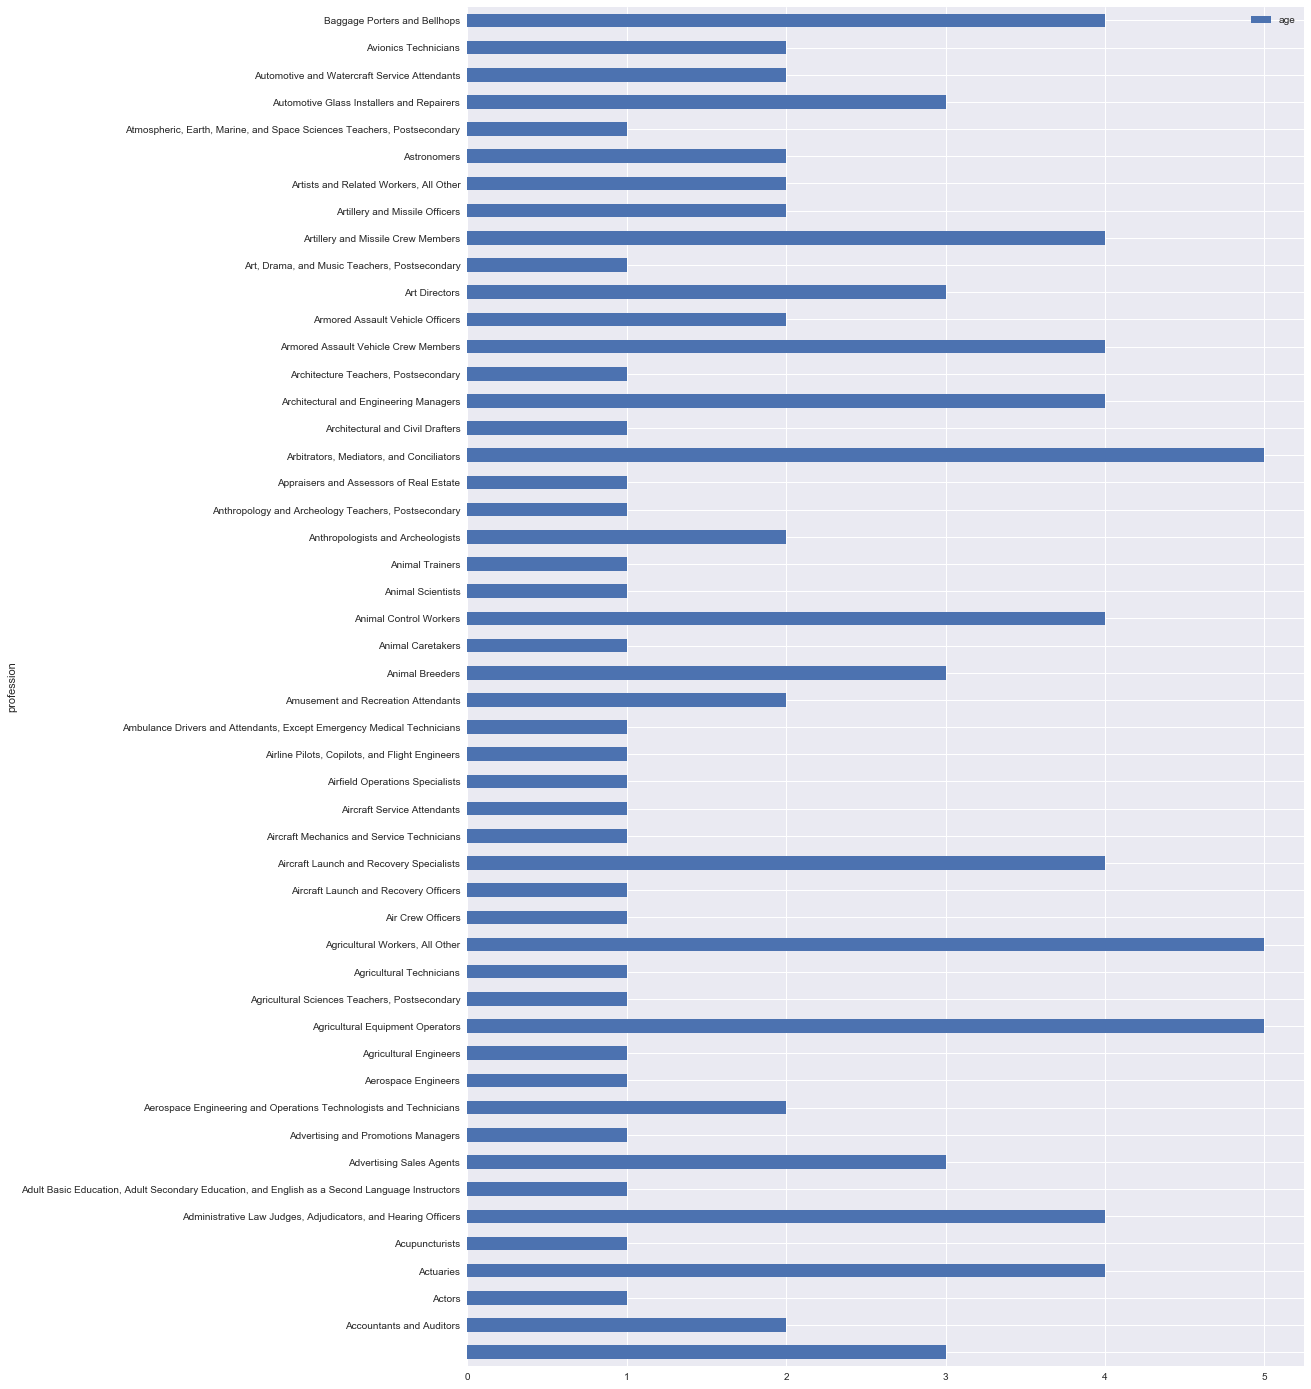

In [16]:
%matplotlib inline
sns.set()
Country = DF.groupby('profession').count()['age']
df = pd.DataFrame(Country)
#df = df.sort_values('age')
df[0:50].plot.barh(figsize = [15,25])

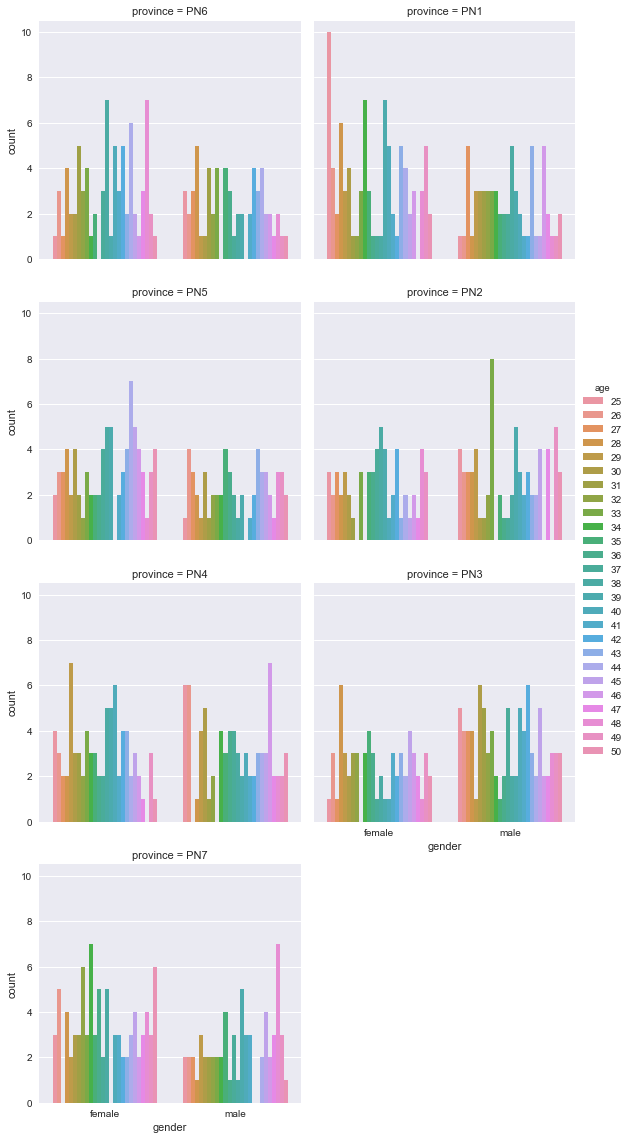

In [17]:
plt.figure(figsize = (16,21))
sns.set(color_codes=True)
sns.factorplot("gender", col="province", data=DF, 
               hue='age', kind="count", col_wrap=2);

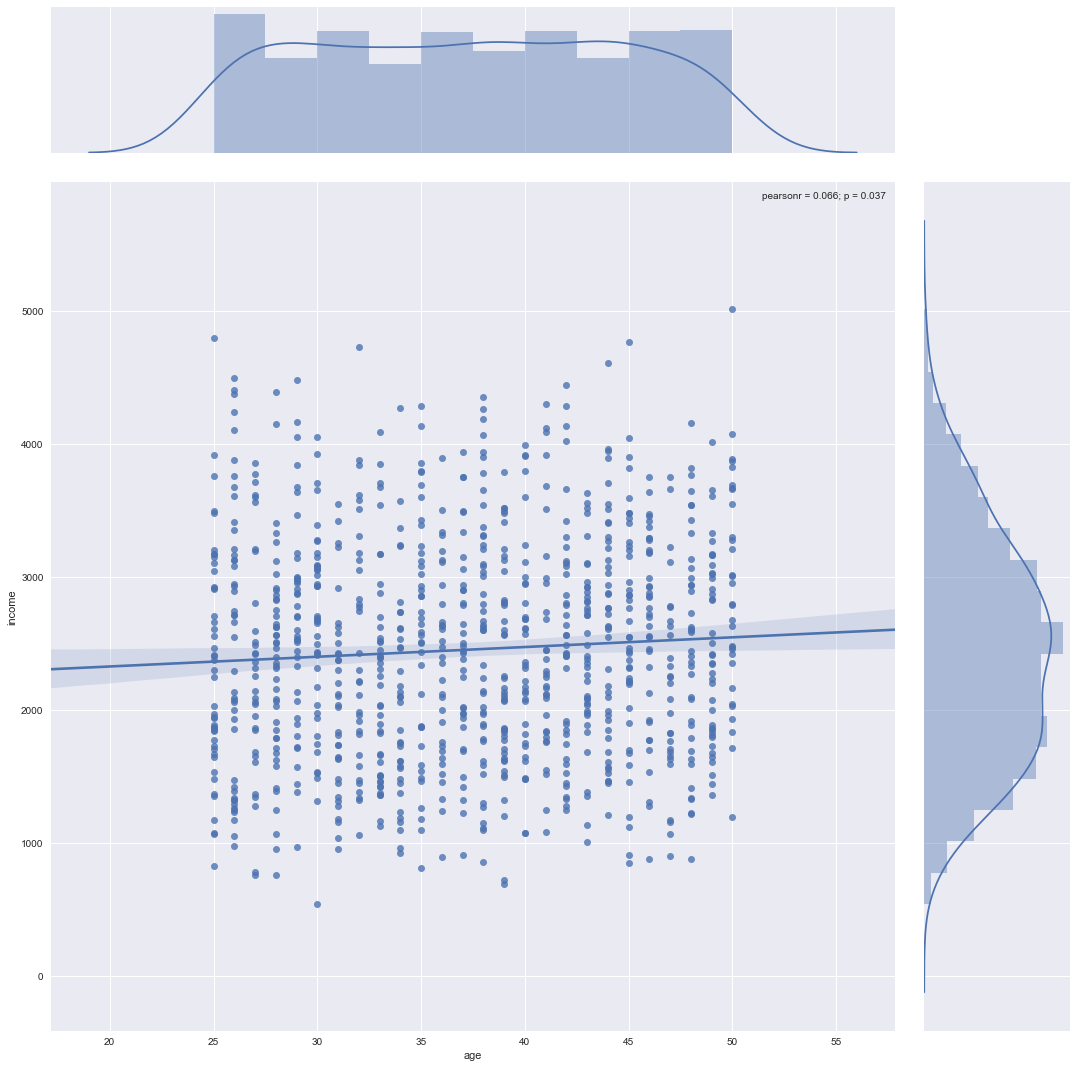

In [18]:
plt.figure(figsize = (15,21))
sns.jointplot(x="age", y="income", data=DF,size=15,kind = 'reg');

### Age Distribution density plot

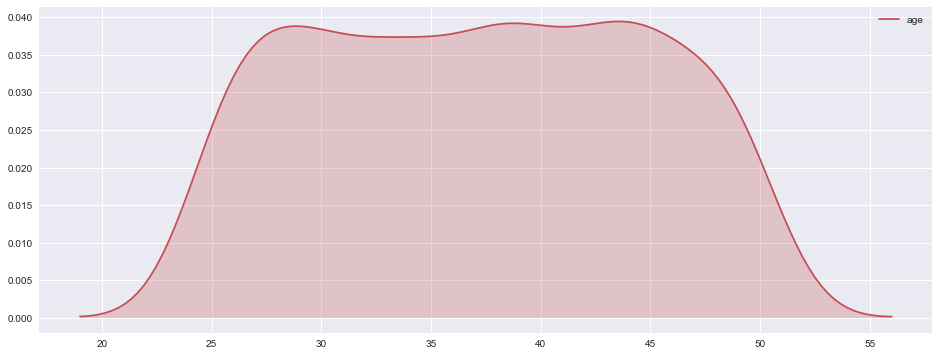

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
dims = (16, 6)
fig, ax = plt.subplots(figsize=dims)
sns.set_style({'axes.grid' : True})
sns.kdeplot(ax=ax, data=DF.age, shade=True, color = 'r')


### Gender and age Correlation

In [40]:
new=DF.drop(['MCP','city','city','date_out','date_return','lat','lon','profession','province','ward','rounded_income'], axis=1)

In [41]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 3LJJB6B924 to S8F33VUEW2
Data columns (total 7 columns):
age         1000 non-null int64
country     1000 non-null object
district    1000 non-null object
gender      1000 non-null object
income      1000 non-null int64
interest    1000 non-null object
month       991 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 102.5+ KB


In [42]:
new.tail(5)

,age,country,district,gender,income,interest,month
ID,,,,,,,
5P7R24AY2W,43,Austria,Dhading,female,2716,gardening,80.0
A12200AKCE,28,Benin,Arghakhanchi,male,3122,teaching,124.0
10D784X6H8,42,Ecuador,Manang,female,1635,art,77.0
6A2G0N5624,39,New-Caledonia,Baglung,female,2567,stories,141.0
S8F33VUEW2,50,China,Mahottari,male,3660,poem,98.0


In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label=LabelEncoder()
# new['age']=label.fit_transform(new['age'])
new['country']=label.fit_transform(new['country'])
new['district']=label.fit_transform(new['district'])
new['gender'] = label.fit_transform(new['gender'])
# new['income'] = label.fit_transform(new['income'])
new['interest']=label.fit_transform(new['interest'])
new['month']=label.fit_transform(new['month'])

In [44]:
new.tail()

,age,country,district,gender,income,interest,month
ID,,,,,,,
5P7R24AY2W,43,13,16,0,2716,3,81
A12200AKCE,28,22,1,1,3122,14,125
10D784X6H8,42,62,42,0,1635,0,78
6A2G0N5624,39,153,2,0,2567,13,142
S8F33VUEW2,50,44,40,1,3660,9,99


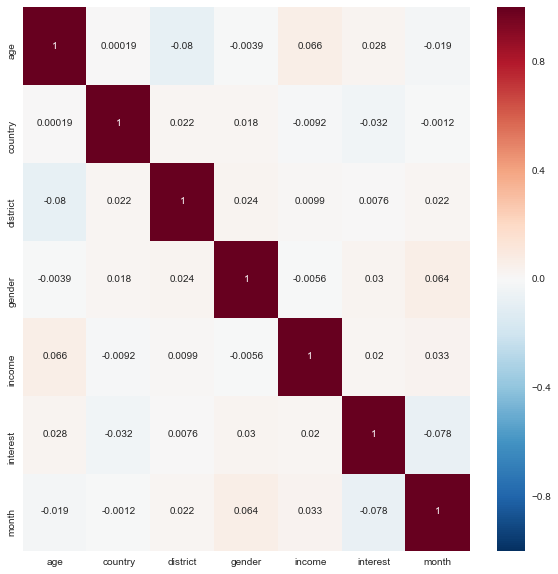

In [47]:
correlation=new.corr()
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot = True)

### Gender,Age distribution

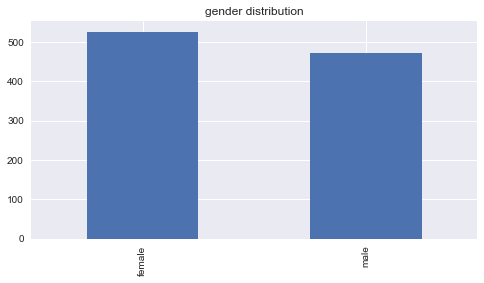

In [59]:
DF.gender.value_counts().plot(kind='bar',grid=True,title='gender distribution',figsize=(8,4))

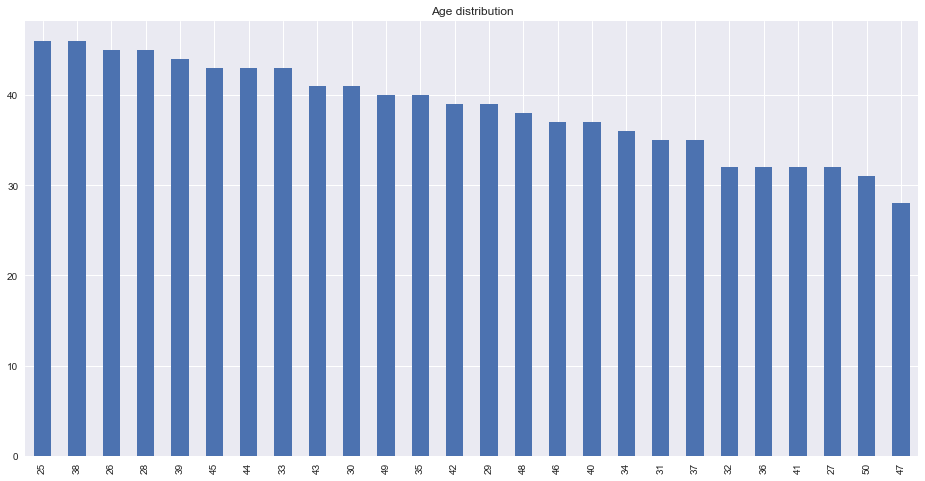

In [60]:
DF.age.value_counts().plot(kind='bar',grid=True,title='Age distribution',figsize=(16,8))

In [19]:
DF.head(2)

,MCP,age,city,country,date_out,date_return,district,gender,income,interest,lat,lon,profession,province,ward,rounded_income,month
ID,,,,,,,,,,,,,,,,,
3LJJB6B924,Bheri MCP,29,N,Costa-Rica,2014-09-21,2022-03-16,Jajarkot,female,3180,art,9.748917,-83.753428,Zoologists and Wildlife Biologists,PN6,Ward 7,3.2k,91.0
5S5MI9J6K4,Bhokraha RM,44,N,Cook-Islands,2011-10-26,2020-03-15,Sunsari,female,3410,novel,-21.236736,-159.777671,Military Enlisted Tactical Operations and Air/...,PN1,Ward 5,3.4k,102.0


### Age Distribution

### <hr>

# Task1 drop views

In [ ]:
# df=pd.DataFrame(Data)
# num_columns = len(df.columns)
# pd.set_option("display.max_columns", num_columns+1)
# df=df.drop(['personal_view'],axis=1)

# Task 2 Seperate home address[PN, District, MCP, Ward]

In [ ]:
# seperate_home_address=df['home_address']
# DF['home_address_province']=DF.iloc[DF['home_address']['province']
# DF['home_address_district']=DF['home_address']['district']
# DF['home_address_MCP']=DF['home_address']['MCP']
# DF['home_address_ward']=DF['home_address']['ward']
# DF['home_address_province']

# Task3 Seperate Foreign address [country, lat, long, city]

In [ ]:
# seperate_foreign_address=df['foreign_address']

# Task 4 Use Lambda function 1000=1k

In [ ]:
def thousand_k(x):
    return str(round((x/1000),1))+'k'

def thousand_k_converter(column_name):
    df['rounded_'+str(column_name)]=df.apply(lambda x: thousand_k(x[str(column_name)]),axis=1)
#     df['rounded_income']=df.apply(lambda x: thousand_k(x['income'],axis=1))

In [ ]:
thousand_k_converter('income')

# Create new column[month] with total month duration between data out-date return

In [ ]:
df.head(2)

In [ ]:
df.info()

In [ ]:
df['date_return']=pd.to_datetime(df.date_return,format='%Y.%m.%d', errors='coerce')
df['date_out']=pd.to_datetime(df.date_out,format='%Y.%m.%d', errors='coerce')

In [ ]:
# new=df['date_return'][0]
# print(new.month)
df['month']=round(((df['date_return']-df['date_out']).dt.days)/30)
# for index, row in df.iterrows():
#     df['the_difference']=relativedelta(row['date_return'],row['date_out'])

In [ ]:
df.head(1)